# Gaussian Naive Bayes

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

## Importing the dataset

The aim is to construct a classifier that predicts whether a user will buy a new SUV given information of his/her Age and Salary.


In [2]:

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X, y

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000],
        [    26,  80000],
        [    26,  52000],
        [    20,  86000],
        [    32,  18000],
        [    18,  82000],
        [    29,  80000],
        [    47,  25000],
        [    45,  26000],
        [    46,  28000],
        [    48,  29000],
        [    45,  22000],
        [    47,  49000],
        [    48,  41000],
        [    45,  22000],
        [    46,  23000],
        [    47,  20000],
        [    49,  28000],
        [    47,  30000],
        [    29,  43000],
        [    31,  18000],
        [    31,  74000],
        [    27, 137000],
        [    21,  16000],
        [    28,  44000],
        [    27,  90000],
        [    35,  27000],
        [    33,  28000],
        [    30,  49000],
        [   

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [6]:
X_train

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/uburoxana/myvenv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/uburoxana/myvenv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/uburoxana/myvenv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]


## Making the Confusion Matrix

In [10]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


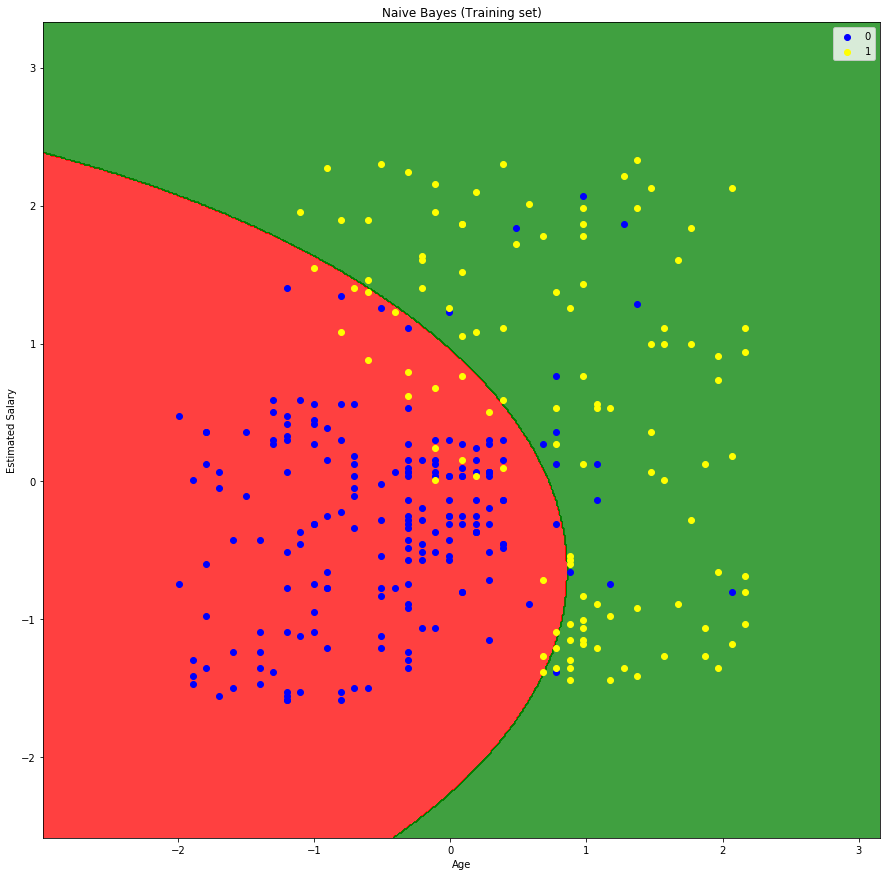

In [11]:
# larger graph 
width = 15
height = 15
plt.figure(figsize=(width, height))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


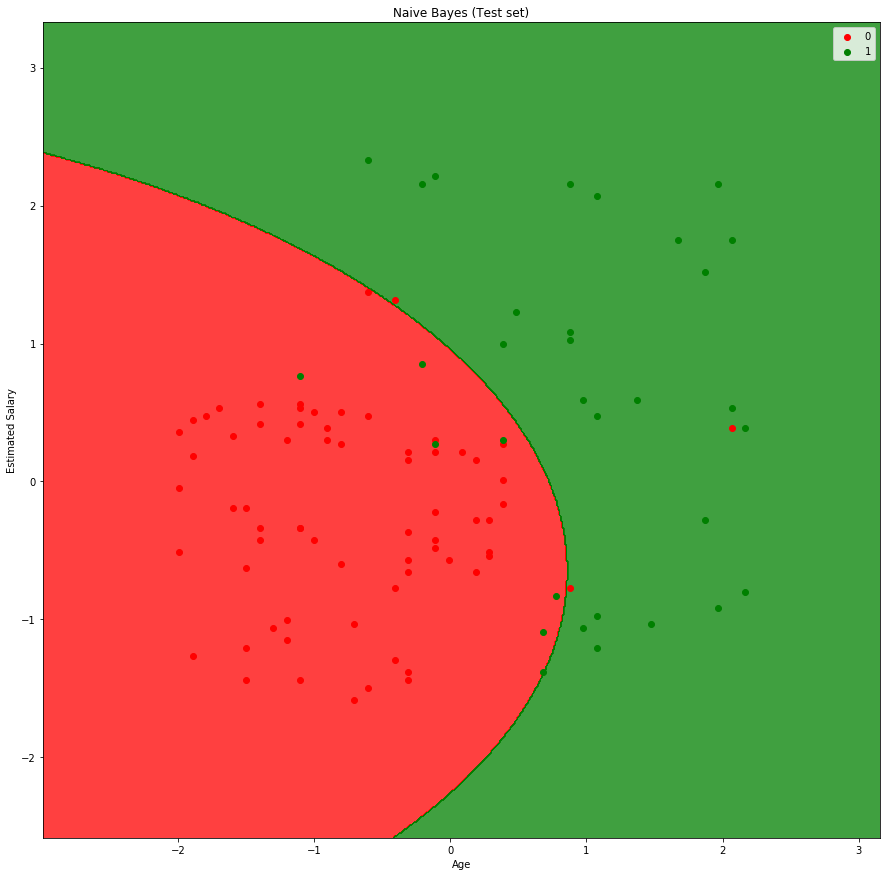

In [12]:
# larger graph 
width = 15
height = 15
plt.figure(figsize=(width, height))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Excercise: Try your own Gaussian Naive Bayes algorithm 

- Hint: compute the mean and standard deviation for each class value and variable|class

- Use a Gaussian function to estimate the probability of a specific attribute value. To do so, you can use the mean and standard deviation computed for that attribute from the training data.

- You should obtain the same confusion matrix of sklearn algorithm


#### INDEX
1. Visualización de datos
2. Methods for my model
3. Model For Naive Bayes

#### 1. Visualizacion de Datos


In [13]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Se visualiza que Purchased en nuestra Clase

In [14]:
# Describe the data
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


#### 2. Methods for my model

In [21]:
# Function to Calculate Likelihood Probability
def pLikelihood_x_given_y(x, mean_y, variance_y):
    probb = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    return probb

In [22]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi)*stdev))*exponent

In [28]:
def get_predictions(X_test,Probb_Original,Probb_Fake, original_Age_mean, original_EstimatedSalary_mean, fake_Age_mean, fake_EstimatedSalary_mean, original_Age_mean_variance,original_EstimatedSalary_variance, fake_Age_variance,fake_EstimatedSalary_variance):
    y_pred = []
    for i in range(X_test.shape[0]):
        xx = X_test[i,:]
        p0 = Probb_Fake *pLikelihood_x_given_y(xx[0],fake_Age_mean,fake_Age_variance)*pLikelihood_x_given_y(xx[1],fake_EstimatedSalary_mean,fake_EstimatedSalary_variance)
        p1 = Probb_Original*pLikelihood_x_given_y(xx[0],original_Age_mean,original_Age_mean_variance)*pLikelihood_x_given_y(xx[1],original_EstimatedSalary_mean,original_EstimatedSalary_variance)

        if p0>=p1:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

In [29]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))*100.0

#### 3. Model For Naive Bayes

In [30]:
def main(X_train,X_test,y_test):
    #filename = 'Social_Network_Ads.csv'
    #Create dataframe to set of training escalonado
    scaled_df = pd.DataFrame(X_train, columns=['Age','EstimatedSalary'])
    scaled_df['Purchased'] = pd.Series(y_train,index=scaled_df.index)
    train_dataset= scaled_df.head(X_train.shape[0])
    
    # Count the number of Original and Fake Notes
    # Original: Purchase =1
    # Fake: Purchase = 0
    num_classOriginal = train_dataset['Purchased'][train_dataset['Purchased'] == 1].count()
    num_classFake = train_dataset['Purchased'][train_dataset['Purchased'] == 0].count()
    total = len(train_dataset)

    print('Number of Original Bank Notes: ',num_classOriginal)
    print('Number of Fake Bank Notes: ',num_classFake)
    print('Total number of Notes: ',total)
    
    # Calculating the Prior Probabilities

    # Probability(Original Note)
    Probb_Original = num_classOriginal/total
    print('Probability of Original Notes in Dataset: ',Probb_Original)

    # Probability(Fake Note)
    Probb_Fake = num_classFake/total
    print('Probability of Fake Notes in Dataset: ',Probb_Fake)
    
    # Data Mean
    data_mean = train_dataset.groupby('Purchased').mean()
    print('MEAN: \n',data_mean)

    print('\n')

    # Data Variance
    data_variance = train_dataset.groupby('Purchased').var()
    print('VARIANCE: \n',data_variance)
    
    # Variables for each feature-------------------------------------------------
    # Means for class 1
    #original_UserID_mean = data_mean['User ID'][data_variance.index == 1].values[0]
    original_Age_mean = data_mean['Age'].values[1]
    original_EstimatedSalary_mean = data_mean['EstimatedSalary'].values[0]
    # Variance for class 1
    #original_UserID_variance = data_variance['User ID'][data_variance.index == 1].values[0]
    original_Age_mean_variance = data_variance['Age'].values[1]
    original_EstimatedSalary_variance = data_variance['EstimatedSalary'].values[0]
    # Means for class 0
    #fake_UserID_mean = data_mean['User ID'][data_variance.index == 0].values[0]
    fake_Age_mean = data_mean['Age'].values[0]
    fake_EstimatedSalary_mean = data_mean['EstimatedSalary'].values[0]
    # Variance for class 0
    #fake_UserID_variance = data_variance['User ID'][data_variance.index == 0].values[0]
    fake_Age_variance = data_variance['Age'].values[0]
    fake_EstimatedSalary_variance = data_variance['EstimatedSalary'].values[0]

    print('class1_edad_mean:',original_Age_mean)
    print('class1_salary_mean:',original_EstimatedSalary_mean)
    print('class1_edad_variance:',original_Age_mean_variance)
    print('class1_salary_variance:',original_EstimatedSalary_variance)
    print('class0_edad_mean:',fake_Age_mean)
    print('class0_salary_mean:',fake_EstimatedSalary_mean)
    print('class0_edad_variance:',fake_Age_variance)
    print('class0_salary_variance:',fake_EstimatedSalary_variance)
    #train_dataset
    #train_dataset, testSet = splitDataset(X, splitRatio)
    #print(trainingSet)
    #print('Split {0} rows into train = {1} and test = {2} rows'.format(len(dataset),len(trainingSet),len(testSet)))
    #summaries = summarizeByClass(train_dataset)
    #print('Summaries: {0}%'.format(summaries))
    #test model
    y_pred2 = np.array(get_predictions(X_test, Probb_Original,Probb_Fake,original_Age_mean, original_EstimatedSalary_mean, fake_Age_mean, fake_EstimatedSalary_mean, original_Age_mean_variance,original_EstimatedSalary_variance, fake_Age_variance,fake_EstimatedSalary_variance))
    #print('Predictions: {0}%'.format(predictions))
    accuracy = getAccuracy(X_test, y_pred2)
    #print('Accuracy: {0}%'.format(accuracy))
    cm = confusion_matrix(y_test, y_pred2)
    print('MatrixConfussion\n',cm)
    
 




In [31]:
main(X_train,X_test,y_test)



Number of Original Bank Notes:  111
Number of Fake Bank Notes:  189
Total number of Notes:  300
Probability of Original Notes in Dataset:  0.37
Probability of Fake Notes in Dataset:  0.63
MEAN: 
                 Age  EstimatedSalary
Purchased                           
0         -0.457403        -0.272635
1          0.778822         0.464217


VARIANCE: 
                 Age  EstimatedSalary
Purchased                           
0          0.603741         0.509655
1          0.723874         1.511057
class1_edad_mean: 0.7788217616615897
class1_salary_mean: -0.27263526623273193
class1_edad_variance: 0.7238735355730073
class1_salary_variance: 0.5096549283815708
class0_edad_mean: -0.45740325684887
class0_salary_mean: -0.27263526623273193
class0_edad_variance: 0.6037405744698591
class0_salary_variance: 0.5096549283815708
MatrixConfussion
 [[66  2]
 [ 8 24]]
